## Lending Club Case study - Loan EDA Assignment

In [63]:
#Import the required libraries
import numpy as np
import pandas as pd
#Import the graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#load the data file loan.csv
df=pd.read_csv("loan.csv",low_memory=False)
df.shape

(39717, 111)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleanup

##### In this section we will clean up the data by removing the null columns. Also, we have some data that need to be converted to a different format to make it easier for analysis

In [66]:
#find out the empty columns in the dataset
# find out empty columns 
nan_columns = df.isnull().sum()
nan_columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [67]:
empty_columns = nan_columns[nan_columns == 39717].index.to_list()

In [68]:
empty_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

##### There are many columns which are blank and can be removed. Those will not be required for data analysis

In [69]:
df.dropna(how='all', axis=1, inplace=True)
df.shape

(39717, 57)

##### Above is the cleaned up data for analysis

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##### Next step is to drop all those columns which are not required for our analysis

In [71]:
df =df.drop([ 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc',
             'pub_rec','revol_bal','revol_util','total_acc','out_prncp',
             'out_prncp_inv','total_pymnt', 'total_pymnt_inv','desc', 
             'mths_since_last_delinq','mths_since_last_record','next_pymnt_d',
             'zip_code','pymnt_plan','url','initial_list_status','collections_12_mths_ex_med',
             'policy_code','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq', 
             'title','total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries',
             'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [73]:
# Lets find the percentage of null fields in our dataset
100*df.isnull().mean()

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [74]:
# Above data shows that emp_title and emp_length do not have ~6% and ~2% data respectively
df= df[~ (df['emp_title'].isna() | df['emp_length'].isna() )]

**let's identify the column we need to investigate** 
 - term - The number of payments on the loan. Values are in months and can be either 36 or 60. 
 - int_rate - Interest Rate on the loan 
 - installment - monthly EMI 
 - grade and sub_grade - LC assigned loan grade
 - emp_title - he job title supplied by the Borrower when applying for the loan.*
 - emp_length -Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
 - home_ownership - The homeownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER
- annual_inc - The self-reported annual income provided by the borrower during registration.
- loan_status Current status of the loan
- loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department -educes the loan amount, then it will be reflected in this value.
- verification_status- Indicates if income was verified by LC, not verified, or if the income source was verifie-
- purpose - A category provided by the borrower for the loan request.-
- dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, exclu-ing -ortgage and the requested LC loan, divided by the borrower’s self-re-orted monthly income.
- delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [75]:
### Now lets find out the Percentage of null again post above cleanup
100*df.isnull().mean()

id                      0.00000
member_id               0.00000
loan_amnt               0.00000
funded_amnt             0.00000
funded_amnt_inv         0.00000
term                    0.00000
int_rate                0.00000
installment             0.00000
grade                   0.00000
sub_grade               0.00000
emp_title               0.00000
emp_length              0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
issue_d                 0.00000
loan_status             0.00000
purpose                 0.00000
addr_state              0.00000
dti                     0.00000
pub_rec_bankruptcies    1.75797
dtype: float64

In [76]:
# check the value count for employee title again 
df['emp_title'].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Five County Assoc of Governments       1
Far Niente Winery Inc                  1
Tobyhanna Army Depot                   1
Community College of Philadelphia      1
Evergreen Center                       1
Name: count, Length: 28775, dtype: int64

In [77]:
df.shape

(37202, 21)

In [78]:
#check the tenure of the employees from data set
df['emp_length'].value_counts()

emp_length
10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: count, dtype: int64

##### There are non-integer values in data which need to be converted to integer for our analysis

In [79]:
## Define a function to convert the employee length to integar
def update_value(colValue):
    match colValue:
        case "10+ years":
            result = "10"
        case "< 1 year":
            result = "0"
        case "1 year":
            result = "1"
        case _:
            result = colValue.replace("years","") #Replace the text with ""
    return result.strip()

In [80]:
df['no_of_years_service']=df['emp_length'].apply(lambda x : int(update_value(x)))

In [81]:
#Similarly lets check the term column which has string values and we may need to change to numeric for our analysis
df['term'].value_counts()

term
36 months    27125
60 months    10077
Name: count, dtype: int64

In [82]:
# lets convert 60months 5 years and 36months as 3 years in term column
df['loan_term'] = df['term'].apply(lambda x : int( x.replace('months','').strip())/12)

In [83]:
#Check for the value count for term
df['loan_term'].value_counts()

loan_term
3.0    27125
5.0    10077
Name: count, dtype: int64

In [211]:
#check the loan amount column
df['loan_amnt'].describe()

count    36548.000000
mean     11294.866340
std       7435.395805
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### let us create another loan category basis the loan amount as small, medium and big

In [212]:
## Define a function to categorize based on loan amount
def loan_amount_type(n):
    if n < 5550:
        return 'small'
    elif n >=5550 and n < 10000:
        return 'medium'
    elif n >= 10000 and n < 15000:
        return 'high'
    else:
        return 'very high'

In [86]:
# lets create a new column to store the loan category
df['loan_amount_type'] = df['loan_amnt'].apply(lambda x : loan_amount_type(x))

In [87]:
##lets clean the interest rate to remove percentage and convert to number
df['int_rate'] = df['int_rate'].apply(lambda x : float(x.replace('%','').strip()))

In [88]:
df['int_rate'].describe()

count    37202.000000
mean        12.057666
std          3.717259
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

##### similar to loan amount type, we can categorize interest type

In [213]:
## Define a function to categorize based on interest rate type
def int_rate_type(n):
    if n <= 9:
        return 'small'
    elif n > 9 and n <=14:
        return 'medium'
    else:
        return 'high'
    

In [214]:
## Define a function to categorize based on DTI
def dti_category(n):
    if n <= 20:
        return 'Low Risk'
    elif n > 20 and n <=35:
        return 'Medium Risk'
    elif n > 35 and n <=50:
        return 'Fair Risk'    
    else:
        return 'High Risk'

In [173]:
# lets create a new column to store the amount type 
df['dti_type'] = df['dti'].apply(lambda x : dti_category(x))

In [ ]:
# lets create a new column to store the amount type 
df['int_rate_type'] = df['int_rate'].apply(lambda x : int_rate_type(x))

In [189]:
#Lets check the number of years of service which can be a great data point to analyze defaullters
df['no_of_years_service'].describe()

count    36548.000000
mean         5.011902
std          3.542254
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: no_of_years_service, dtype: float64

In [215]:
#Write a function to categorize the customers based on their experience as fresher, Medium Experience, High Experience ad below
def exp_type(n):
    if n <= 1:
        return 'Fresher'
    elif n > 1 and n <=8:
        return 'Medium Exp'
    else:
        return 'High Exp'

In [181]:
# lets create a new column to store the amount type 
df['exp_type'] = df['no_of_years_service'].apply(lambda x : exp_type(x))

#### The income of the customer can also be a variate for the default. Hence lets categorize to analyze the same

In [190]:
df['annual_inc'].describe()

count    3.654800e+04
mean     6.923504e+04
std      6.350343e+04
min      4.000000e+03
25%      4.189800e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [191]:
# Create a method to put the customers into income category based on annual income
def annual_income_type(n):
    if n <= 50000:
        return 'Low'
    elif n > 50000 and n <=100000:
        return 'Medium'
    else:
        return 'High'

In [193]:
# Lets categoroze customers into Low, Medium and High income category for our analysis
df['income_type'] = df['annual_inc'].apply(lambda x : annual_income_type(x))

In [194]:
#lets check the table now. 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type,is_defaulter,dti_type,exp_type,income_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.00,0.0,0,5.0,small,high,1,Low Risk,Fresher,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,20.00,0.0,10,3.0,high,medium,0,Low Risk,High Exp,Low
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,17.94,0.0,1,5.0,small,medium,0,Low Risk,Fresher,Medium
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,11.20,0.0,3,3.0,small,small,0,Low Risk,Medium Exp,Low
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,23.51,0.0,8,5.0,medium,high,0,Medium Risk,Medium Exp,Low


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37202 entries, 1 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37202 non-null  int64  
 1   member_id             37202 non-null  int64  
 2   loan_amnt             37202 non-null  int64  
 3   funded_amnt           37202 non-null  int64  
 4   funded_amnt_inv       37202 non-null  float64
 5   term                  37202 non-null  object 
 6   int_rate              37202 non-null  float64
 7   installment           37202 non-null  float64
 8   grade                 37202 non-null  object 
 9   sub_grade             37202 non-null  object 
 10  emp_title             37202 non-null  object 
 11  emp_length            37202 non-null  object 
 12  home_ownership        37202 non-null  object 
 13  annual_inc            37202 non-null  float64
 14  verification_status   37202 non-null  object 
 15  issue_d               37

In [94]:
100*df.isnull().mean()

id                      0.00000
member_id               0.00000
loan_amnt               0.00000
funded_amnt             0.00000
funded_amnt_inv         0.00000
term                    0.00000
int_rate                0.00000
installment             0.00000
grade                   0.00000
sub_grade               0.00000
emp_title               0.00000
emp_length              0.00000
home_ownership          0.00000
annual_inc              0.00000
verification_status     0.00000
issue_d                 0.00000
loan_status             0.00000
purpose                 0.00000
addr_state              0.00000
dti                     0.00000
pub_rec_bankruptcies    1.75797
no_of_years_service     0.00000
loan_term               0.00000
loan_amount_type        0.00000
int_rate_type           0.00000
dtype: float64

In [95]:
#pub_rec_bankruptcies column still has null values. We need to remove those as well
df = df[~df['pub_rec_bankruptcies'].isna()] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36548 entries, 1 to 39680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36548 non-null  int64  
 1   member_id             36548 non-null  int64  
 2   loan_amnt             36548 non-null  int64  
 3   funded_amnt           36548 non-null  int64  
 4   funded_amnt_inv       36548 non-null  float64
 5   term                  36548 non-null  object 
 6   int_rate              36548 non-null  float64
 7   installment           36548 non-null  float64
 8   grade                 36548 non-null  object 
 9   sub_grade             36548 non-null  object 
 10  emp_title             36548 non-null  object 
 11  emp_length            36548 non-null  object 
 12  home_ownership        36548 non-null  object 
 13  annual_inc            36548 non-null  float64
 14  verification_status   36548 non-null  object 
 15  issue_d               36

In [96]:
100*df.isnull().mean()

id                      0.0
member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
no_of_years_service     0.0
loan_term               0.0
loan_amount_type        0.0
int_rate_type           0.0
dtype: float64

### Data Analysis

In [100]:
#lets check the data to be used for analysis
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Dec-11,Charged Off,car,GA,1.00,0.0,0,5.0,small,high
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Dec-11,Fully Paid,other,CA,20.00,0.0,10,3.0,high,medium
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Dec-11,Current,other,OR,17.94,0.0,1,5.0,small,medium
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,3,3.0,small,small
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0,8,5.0,medium,high


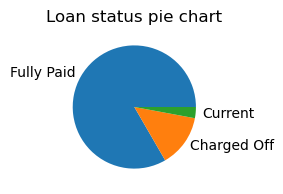

In [216]:
##Lets check the loan status
# Set size for the graph
plt.figure(figsize=(2,2))
#define labels
data_labels = ['Fully Paid','Charged Off','Current']
#define data for the graph
data = df['loan_status'].value_counts()
#plot the graph
plt.pie(data, labels=data_labels)
#set graph title
plt.title("Loan status pie chart")
#show graph
plt.show()

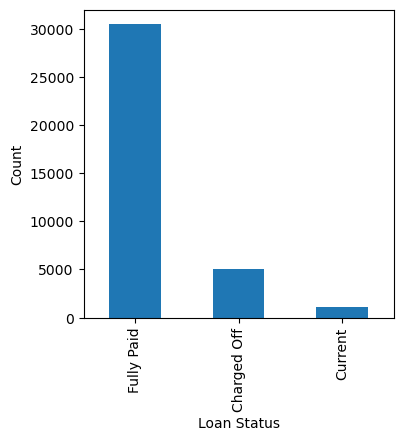

In [217]:
#plot using a bar chart
plt.figure(figsize=(4,4))
#plt.bar(5, 5, breadth = 0.8)
df['loan_status'].value_counts().plot.bar(15,15, width=.5)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

##### Now we can start marking defaulters based on the data. We can create a new column to store the same
##### We know that if charged off, we can mark them as defaulters

In [117]:
df['is_defaulter'] = df['loan_status'].apply(lambda x: int(1 if x=='Charged Off' else 0))

In [118]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,no_of_years_service,loan_term,loan_amount_type,int_rate_type,is_defaulter
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Charged Off,car,GA,1.00,0.0,0,5.0,small,high,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Fully Paid,other,CA,20.00,0.0,10,3.0,high,medium,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Current,other,OR,17.94,0.0,1,5.0,small,medium,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Fully Paid,wedding,AZ,11.20,0.0,3,3.0,small,small,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,Fully Paid,debt_consolidation,NC,23.51,0.0,8,5.0,medium,high,0


In [119]:
# Lets find out avarage defaulter  based on loan_status
df['loan_status'] = df['loan_status'].astype('category')
category_counts = df['loan_status'].value_counts()

In [120]:
total_records = len(df)
average_occurrence = category_counts/total_records
average_occurrence

loan_status
Fully Paid     0.833507
Charged Off    0.137326
Current        0.029167
Name: count, dtype: float64

#### Based on the available data, we will analyze the patterns to get insight into the customers with risks credit loss and help the lending farm take decisions whether to sanction loan to the customer or not. We will do the analysis in 3 stages
- 1. Finding the customers in the defaulted category (Level -1 Analysis below)
- 2. Univariate analysis - Further dive deep and analyze across loan status (Level 2-11 Below)
- 3. Bi-variate analysis - Further analysis based defaulters two other attributes.

### Level-1 Analysis
##### The above data analysis shows that close to ~13.7% of the customers are in risky category i.e. charged off
##### Since this does not provide a details level of insight, we need to use this information and compare with the other attributes to derive more insights to the riskiest categories/customers

### Level-2 Analysis
##### In this level, we will analyze the defaulted customers according to their grade. The loan grade is given based on the credit score. The customers with grade 'A' are considered the best customers with no/lowest risk and from 'B','C','D','E','F','G' the reliability reduces with increased risk in same sequence.

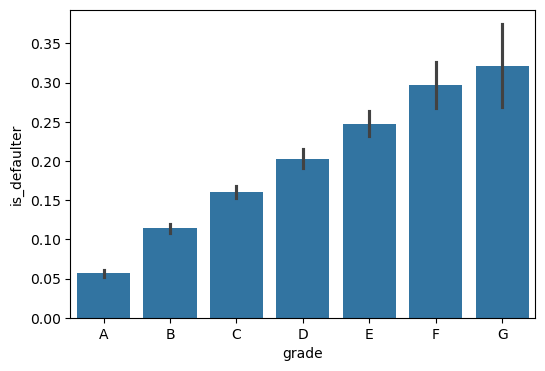

In [137]:
plt.figure(figsize=(6,4))
sns.barplot(x='grade', y='is_defaulter', data=df, order=['A','B','C','D','E','F','G'])
plt.show()

#### Observation
##### As expected, the customers with higher risk grade, are the major defaulters

### Level-3 Analysis
##### In this level we will go little deeper and analyze the defauters at the sub-grade level. This is a further level of categorization within the grade based on their credit history. Each grade is sub-divided into 5 sub-grades. For ex. Grade 'A' is divided into A1,A2,A3,A4,A5.

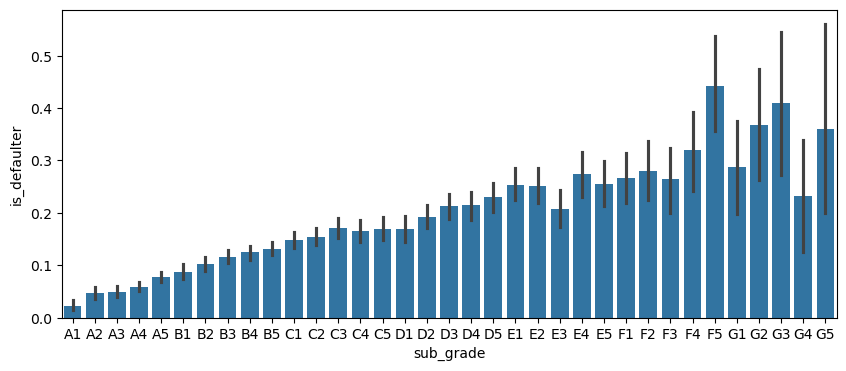

In [140]:
plt.figure(figsize=(10,4))
sns.barplot(x='sub_grade', y='is_defaulter', data=df, order=['A1','A2','A3','A4','A5',
                                                            'B1','B2','B3','B4','B5',
                                                            'C1','C2','C3','C4','C5',
                                                            'D1','D2','D3','D4','D5',
                                                            'E1','E2','E3','E4','E5',
                                                            'F1','F2','F3','F4','F5',
                                                            'G1','G2','G3','G4','G5'])
plt.show()

#### Observation
##### The above analysis shows that customers with higher risk sub-grade are major defaulters even within a grade except few exceptions. The major defaulters are in sub-grade F5 and G3

### Level-4 Analysis
##### Lets compare with the loan term to see how it impacts defaulting

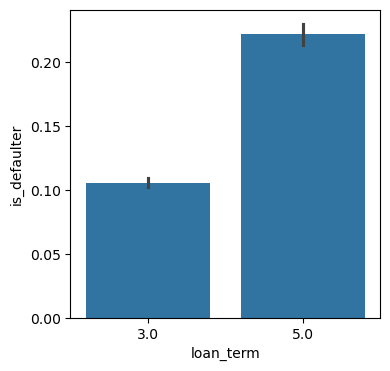

In [145]:
plt.figure(figsize=(4,4))
sns.barplot(x='loan_term', y='is_defaulter', data=df, order=['3.0','5.0'])
plt.show()

#### Observation
##### In this analysis it is clear that customers with higher loan term are in bigger default category

### Level - 5 Analysis
##### In this level lets analyze the defaulters with respect to no_of_years_service

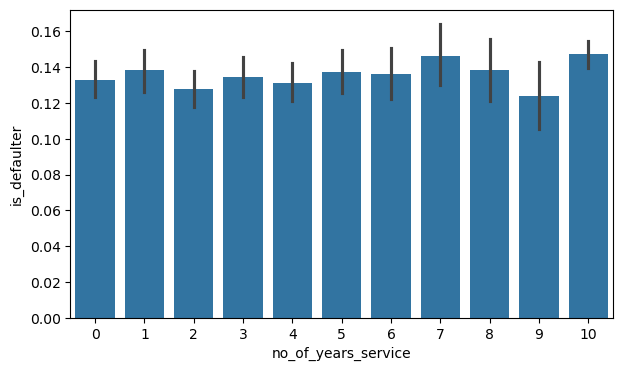

In [149]:
plt.figure(figsize=(7,4))
sns.barplot(x='no_of_years_service', y='is_defaulter', data=df)
plt.show()

#### Observation
##### We dont see any pattern in this category. Hence we can conclude that the number of years of service has not much impact on the defaulting

### Level - 6 Analysis
##### In this level lets see if loan purpose has any impact on the defaulteing

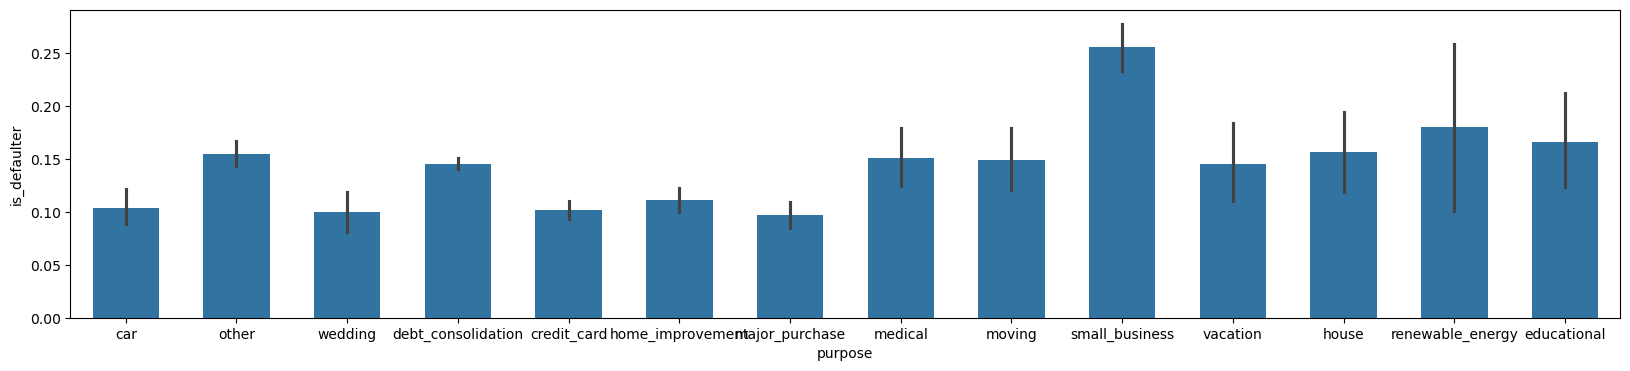

In [156]:
plt.figure(figsize=(20,4))
sns.barplot(x='purpose', y='is_defaulter', data=df, width=.6)
plt.show()

#### Observation
##### The above analysis shows that the customers taking loan for small businesses are major defaulters compared to any other category

### Level - 7 analysis
##### In this level we will see if the loan_amount_type has any impact on the defaulting

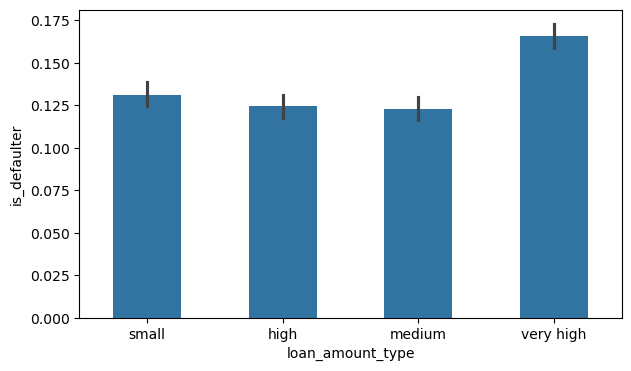

In [210]:
plt.figure(figsize=(7,4))
sns.barplot(x='loan_amount_type', y='is_defaulter', data=df, width=.5)
plt.show()

#### Obesrvation
##### The above analysis shows that the customers with 'very high' loan amount i.e >=15000 are major defaulters compared those with lower loan amount

### Level -8 Analysis
##### Here we will analyze if int_rate_type has any impact on defaulting

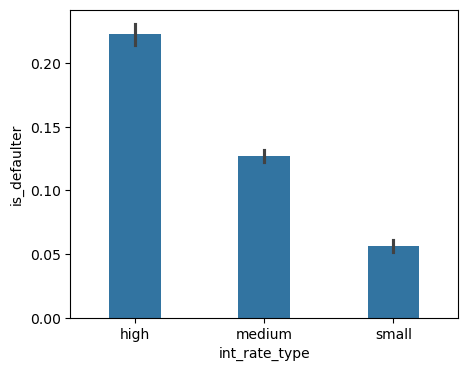

In [163]:
plt.figure(figsize=(5,4))
sns.barplot(x='int_rate_type', y='is_defaulter', data=df, width=.4)
plt.show()

#### Observation
##### The above analysis shows that the customer who were given loan at high interest are major defaulters i.e. interest rate > 14%

### Level - 9 analysis
##### another major attribute to check is the verification status. Without proper verification of the customer, income source etc. the risk of defaulting increase. We can analyze the same based on the data.

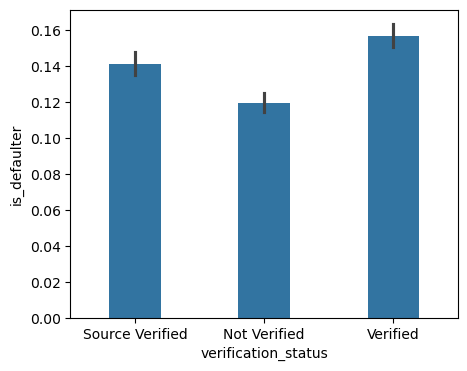

In [164]:
plt.figure(figsize=(5,4))
sns.barplot(x='verification_status', y='is_defaulter', data=df, width=.4)
plt.show()

#### Observation
##### In this case the verified customers seem to be the major defaulters which does not make any sense as verification always reduces risk. Hence this insight does not help in any conclusion.

### Level - 10 Analysis
##### In this level lets analyze the defaulters against their debt to self-reported monthly income

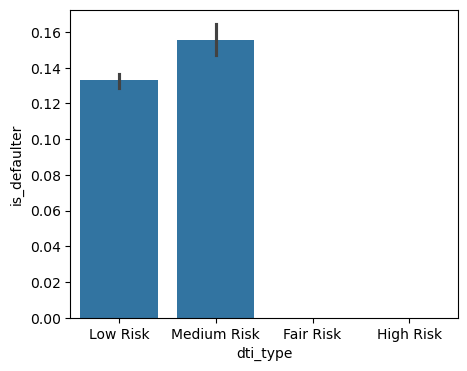

In [176]:
plt.figure(figsize=(5,4))
sns.barplot(x='dti_type', y='is_defaulter', data=df, order=['Low Risk','Medium Risk','Fair Risk','High Risk'])
plt.show()

#### Observation
##### This also does not give any conclusion as the customers at higher risk of dti are not the defaulters whereas the customers in low and medium risk are the major defaulters.


### Level 11 - Analysis
##### At this level, we will check if the number of years of experience shows any pattern for defaulting

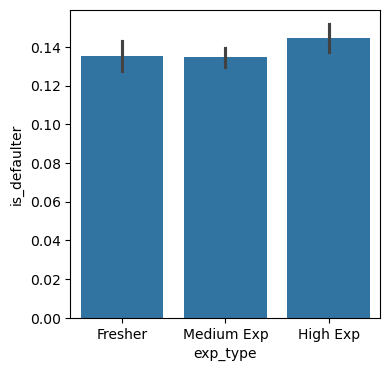

In [184]:
#now let's look at experience  with defaulter 
plt.figure(figsize=(4,4))
sns.barplot(x='exp_type', y='is_defaulter', data=df, order=['Fresher','Medium Exp','High Exp'])
plt.show()

#### Observation
##### The above analysis shows that years of experience is not a determisistic factor for defaulting

### 

### Leval 12 - Analysis
##### Income type also another attribute which can impact paying back the loan. At this level we will get insight into it

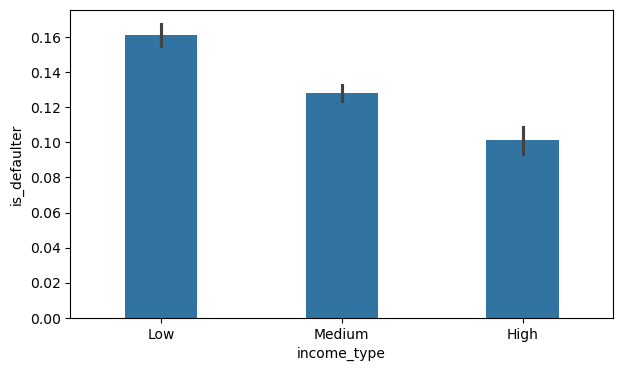

In [199]:
#Lets look at the graph for people with different income bracket
plt.figure(figsize=(7,4))
sns.barplot(x='income_type', y='is_defaulter', data=df, order= ['Low', 'Medium','High'], width=0.4)
plt.show()

#### Observation
##### The above graph shows that the customer with lower i.e. <50000 income are major defaulters

### Now we can do bi-variate analysis by using other attributes along with defaulters

### Level 13 - Analysis
#### Lets compare with the below attributes
- loan_amount_type
- is_defaulter
- grade

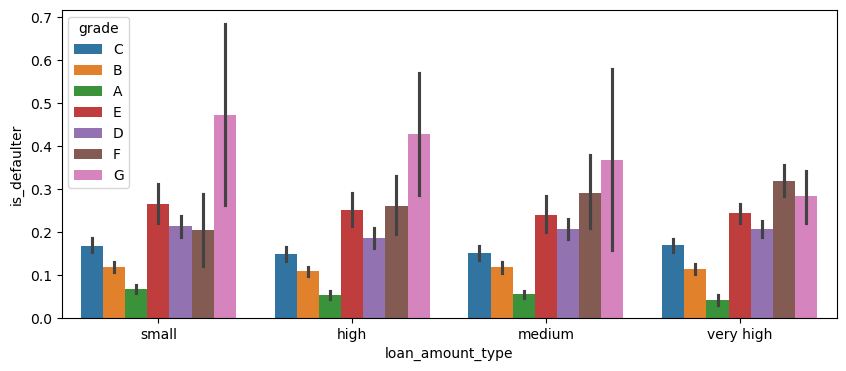

In [201]:
# Lets compare a few more variable 
plt.figure(figsize=[10, 4])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='grade', data=df)
plt.show()

#### Observation
##### Above analysis shows that the customers with lower grade especially G are into higher defaulter bracket for any loan amount type

### Level 15 - Analysis
#### Lets compare with the below attributes
- loan_amount_type
- is_defaulter
- Term

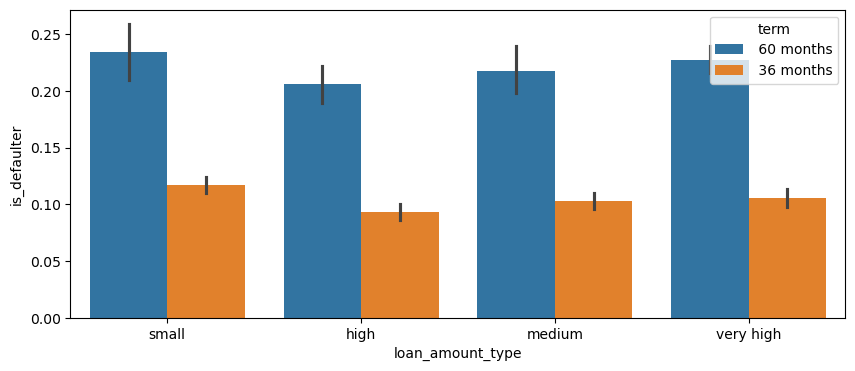

In [204]:
# Lets compare with the loan amount type and term
plt.figure(figsize=[10, 4])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='term', data=df)
plt.show()

#### Observation
##### The above graph shows that the loans with higher term has more defaulters for any loan amount type

### Level 16 - Analysis
#### Lets compare with the below attributes
- loan_amount_type
- is_defaulter
- purpose

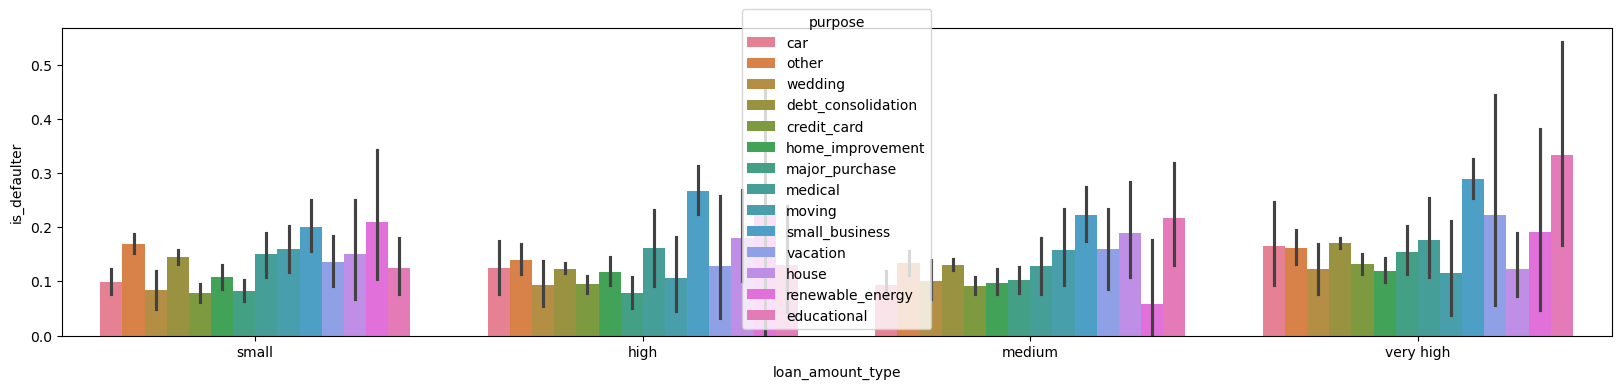

In [206]:
# Lets compare with the loan amount and purpose
plt.figure(figsize=[20, 4])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='purpose', data=df)
plt.show()

#### Observation
##### Here again we can see the customers taken loan for small businesses are majorly into defaulters for any loan amount type

### Level 17 - Analysis
#### Lets compare with the below attributes
- loan_amount_type
- is_defaulter
- int_rate_type

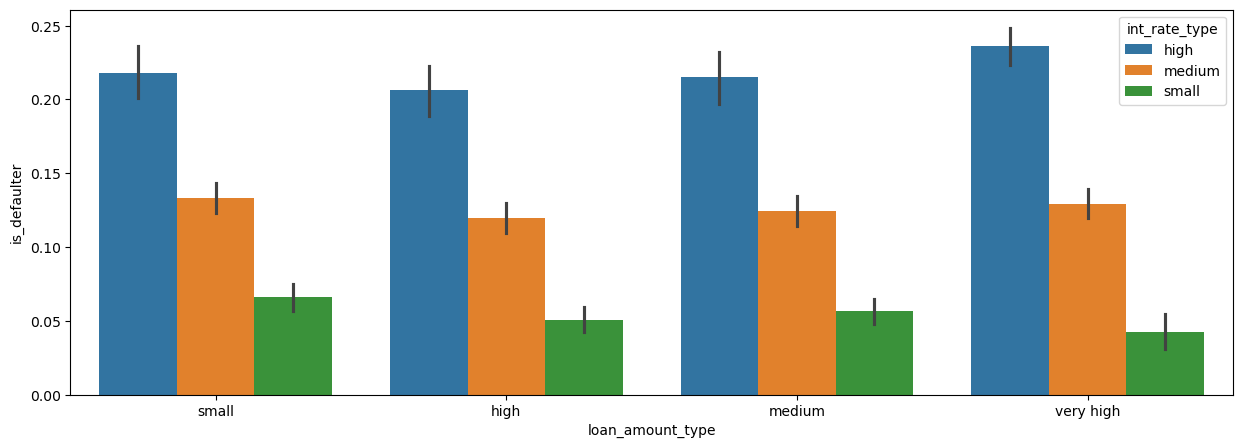

In [208]:
# Lets compare with the loan amount type and interest rate type
plt.figure(figsize=[15, 5])
sns.barplot(x='loan_amount_type', y="is_defaulter", hue='int_rate_type', data=df)
plt.show()

#### Observation
##### Above shows that the customers given loan with higher interest rate are major defaulters for any loan amount type